### Gathering Data

#### Summer League Data from RealGM

In [ ]:
import requests
import pandas as pd

def get_realgm_table(slug: str, season_id: int, stat_path: str = "stats") -> pd.DataFrame:
    """
    Download a Summer-League table from RealGM and return as a DataFrame.
    """
    url = f"https://basketball.realgm.com/nba/summer/1/{slug}/{season_id}/{stat_path}"
    headers = {"User-Agent": "Mozilla/5.0"}
    html = requests.get(url, headers=headers, timeout=30).text

    df = pd.read_html(html, header=0)[0]
    if "#" in df.columns:
        df = df.rename(columns={"#": "rk"}).drop(columns="rk")
    # coerce numeric columns
    numeric_cols = df.columns.drop(["Player", "Team"])
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")
    return df

# 1) Your manual ID → season mapping:
id_to_season = {
    26: "2013-14",
    27: "2014-15",
    30: "2015-16",
    34: "2016-17",
    37: "2017-18",
    39: "2018-19",
    43: "2019-20",
    47: "2021-22",  # no 2020-21
    49: "2022-23",
    53: "2023-24",
    55: "2024-25",
    59: "2025-26",
}

# 2) Loop through each ID, fetch, tag, collect:
all_dfs = []
for season_id, season_label in id_to_season.items():
    print(f"Fetching Summer League {season_label} (ID={season_id})…")
    df = get_realgm_table("NBA-Summer-League", season_id, stat_path="stats")
    df["Season"] = season_label
    all_dfs.append(df)

# 3) Concatenate and export:
master_df = pd.concat(all_dfs, ignore_index=True)
master_df.to_csv("summer_league_2013_2026.csv", index=False)
master_df
print(f"\n✅ Wrote {master_df.shape[0]} rows to summer_league_2013_2026.csv")


Fetching Summer League 2013-14 (ID=26)…


/var/folders/1b/h143g9yn0nv03fhs8tg1jg7r0000gn/T/ipykernel_86480/2411180407.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, header=0)[0]


Fetching Summer League 2014-15 (ID=27)…


/var/folders/1b/h143g9yn0nv03fhs8tg1jg7r0000gn/T/ipykernel_86480/2411180407.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, header=0)[0]


Fetching Summer League 2015-16 (ID=30)…


/var/folders/1b/h143g9yn0nv03fhs8tg1jg7r0000gn/T/ipykernel_86480/2411180407.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, header=0)[0]
/var/folders/1b/h143g9yn0nv03fhs8tg1jg7r0000gn/T/ipykernel_86480/2411180407.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, header=0)[0]


Fetching Summer League 2016-17 (ID=34)…
Fetching Summer League 2017-18 (ID=37)…


/var/folders/1b/h143g9yn0nv03fhs8tg1jg7r0000gn/T/ipykernel_86480/2411180407.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, header=0)[0]


Fetching Summer League 2018-19 (ID=39)…


/var/folders/1b/h143g9yn0nv03fhs8tg1jg7r0000gn/T/ipykernel_86480/2411180407.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, header=0)[0]


Fetching Summer League 2019-20 (ID=43)…


/var/folders/1b/h143g9yn0nv03fhs8tg1jg7r0000gn/T/ipykernel_86480/2411180407.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, header=0)[0]


Fetching Summer League 2021-22 (ID=47)…


/var/folders/1b/h143g9yn0nv03fhs8tg1jg7r0000gn/T/ipykernel_86480/2411180407.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, header=0)[0]


Fetching Summer League 2022-23 (ID=49)…


/var/folders/1b/h143g9yn0nv03fhs8tg1jg7r0000gn/T/ipykernel_86480/2411180407.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, header=0)[0]


Fetching Summer League 2023-24 (ID=53)…


/var/folders/1b/h143g9yn0nv03fhs8tg1jg7r0000gn/T/ipykernel_86480/2411180407.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, header=0)[0]


Fetching Summer League 2024-25 (ID=55)…


/var/folders/1b/h143g9yn0nv03fhs8tg1jg7r0000gn/T/ipykernel_86480/2411180407.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, header=0)[0]


Fetching Summer League 2025-26 (ID=59)…

✅ Wrote 4708 rows to summer_league_2013_2026.csv


/var/folders/1b/h143g9yn0nv03fhs8tg1jg7r0000gn/T/ipykernel_86480/2411180407.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, header=0)[0]


#### Advanced Stats from BBall-Ref

In [ ]:
# 1) Define ending years for 2013-14 through 2024-25
ending_years = list(range(2014, 2026))  # [2014, 2015, …, 2025]

all_adv = []
for end in ending_years:
    season_label = f"{end-1}-{str(end)[-2:]}"   # "2013-14", ..., "2024-25"
    url = f"https://www.basketball-reference.com/leagues/NBA_{end}_advanced.html#advanced"
    print(f"Fetching {season_label} -> {url}")
    
    # this returns the advanced table as the first DataFrame
    df = pd.read_html(url)[0]
    
    # tag with season
    df["Season"] = season_label
    all_adv.append(df)

# 2) Concatenate & save
adv_master = pd.concat(all_adv, ignore_index=True)
adv_master.to_csv("bbref_advanced_2013_2025.csv", index=False)
print(f"Wrote {adv_master.shape[0]} rows → bbref_advanced_2013_2025.csv")
adv_master


Fetching 2013-14 -> https://www.basketball-reference.com/leagues/NBA_2014_advanced.html#advanced
Fetching 2014-15 -> https://www.basketball-reference.com/leagues/NBA_2015_advanced.html#advanced
Fetching 2015-16 -> https://www.basketball-reference.com/leagues/NBA_2016_advanced.html#advanced
Fetching 2016-17 -> https://www.basketball-reference.com/leagues/NBA_2017_advanced.html#advanced
Fetching 2017-18 -> https://www.basketball-reference.com/leagues/NBA_2018_advanced.html#advanced
Fetching 2018-19 -> https://www.basketball-reference.com/leagues/NBA_2019_advanced.html#advanced
Fetching 2019-20 -> https://www.basketball-reference.com/leagues/NBA_2020_advanced.html#advanced
Fetching 2020-21 -> https://www.basketball-reference.com/leagues/NBA_2021_advanced.html#advanced
Fetching 2021-22 -> https://www.basketball-reference.com/leagues/NBA_2022_advanced.html#advanced
Fetching 2022-23 -> https://www.basketball-reference.com/leagues/NBA_2023_advanced.html#advanced
Fetching 2023-24 -> https://ww

,Rk,Player,Age,Team,Pos,G,GS,MP,PER,TS%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards,Season
0,1.0,Kevin Durant,25.0,OKC,SF,81.0,81.0,3122.0,29.8,0.635,...,14.8,4.4,19.2,0.295,8.8,1.4,10.2,9.6,"MVP-1,AS,NBA1",2013-14
1,2.0,Monta Ellis,28.0,DAL,SG,82.0,82.0,3023.0,16.8,0.532,...,2.8,2.1,4.9,0.078,0.3,-0.5,-0.3,1.3,NaN,2013-14
2,3.0,DeMar DeRozan,24.0,TOR,SG,79.0,79.0,3017.0,18.4,0.532,...,5.8,3.0,8.8,0.141,1.9,-0.3,1.7,2.8,AS,2013-14
3,4.0,Carmelo Anthony,29.0,NYK,PF,77.0,77.0,2982.0,24.4,0.561,...,8.1,2.5,10.7,0.172,5.8,-0.8,5.0,5.3,"MVP-15,AS",2013-14
4,5.0,John Wall,23.0,WAS,PG,82.0,82.0,2980.0,19.5,0.524,...,4.0,4.0,7.9,0.128,2.4,0.4,2.7,3.6,AS,2013-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8131,566.0,James Wiseman,23.0,IND,C,1.0,0.0,5.0,31.2,0.615,...,0.0,0.0,0.0,0.237,6.0,-4.4,1.6,0.0,NaN,2024-25
8132,567.0,Alondes Williams,25.0,DET,SG,1.0,0.0,4.0,53.4,1.250,...,0.0,0.0,0.0,0.565,37.9,6.2,44.1,0.0,NaN,2024-25
8133,568.0,Zyon Pullin,23.0,MEM,SG,3.0,0.0,3.0,-11.7,0.000,...,0.0,0.0,0.0,-0.304,-15.0,-7.7,-22.7,0.0,NaN,2024-25
8134,569.0,Jahlil Okafor,29.0,IND,C,1.0,0.0,3.0,13.8,NaN,...,0.0,0.0,0.0,0.196,2.5,4.9,7.5,0.0,NaN,2024-25


### Cleaning Data

In [ ]:
import unicodedata
import re

# 0) Adjust these paths if your files live elsewhere
SL_PATH  = "summer_league_2013_2026.csv"
ADV_PATH = "bbref_advanced_2013_2025.csv"
OUT_PATH = "rookie_combined_cleaned.csv"

# 1) Load
sl_df  = pd.read_csv(SL_PATH)
adv_df = pd.read_csv(ADV_PATH)

# 2) Clean player names
def clean_name(name):
    # normalize accents
    name = unicodedata.normalize("NFKD", str(name)).encode("ascii","ignore").decode()
    # drop common suffixes
    name = re.sub(r"\b(JR|SR|II|III|IV)\b\.?", "", name, flags=re.IGNORECASE)
    return " ".join(name.split())

for df in (sl_df, adv_df):
    df["Player"] = df["Player"].apply(clean_name)

# 3) Restrict SL to overlapping seasons (drop SL's 2025-26, since ADV only goes to 2024-25)
valid_seasons = set(adv_df["Season"].unique())
sl_df = sl_df[sl_df["Season"].isin(valid_seasons)]

# 4) Identify each player's rookie season in ADV and keep only that row
first_seasons = (adv_df
                 .groupby("Player")["Season"]
                 .min()
                 .rename("RookieSeason")
                 .reset_index())
rookie_adv = adv_df.merge(first_seasons,
                          left_on=["Player","Season"],
                          right_on=["Player","RookieSeason"],
                          how="inner")

# 5) Inner‑join SL → rookie Advanced on Player & Season
merged = pd.merge(rookie_adv, sl_df,
                  on=["Player","Season"],
                  suffixes=("_adv","_sl"),
                  how="inner")

# 6) Drop rows with missing values in core stats
drops = ["PTS", "AST", "TRB", "PER", "BPM", "WS/48"]
# only drop if column exists
drops = [c for c in drops if c in merged.columns]
merged = merged.dropna(subset=drops)

# 7) Save the cleaned, merged rookie‐only dataset
merged.to_csv(OUT_PATH, index=False)
print(f"Saved {len(merged)} rows → {OUT_PATH}")
merged.head(50)

Saved 828 rows → rookie_combined_cleaned.csv


,Rk,Player,Age,Team_adv,Pos,G,GS,MP,PER,TS%,...,FTA,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF
0,52.0,P.J. Tucker,28.0,PHO,SF,81.0,81.0,2490.0,13.3,0.540,...,2.9,0.750,1.7,4.1,5.9,1.1,1.4,0.1,1.3,2.4
1,81.0,Jonas Valanciunas,21.0,TOR,C,81.0,81.0,2282.0,16.1,0.579,...,8.3,0.879,2.8,7.3,10.0,1.8,0.3,0.8,5.0,5.8
2,95.0,Ben McLemore,20.0,SAC,SG,82.0,55.0,2187.0,7.7,0.485,...,5.4,0.741,1.0,4.0,5.0,0.0,0.6,0.4,3.6,1.8
3,101.0,Terrence Ross,22.0,TOR,SG,81.0,62.0,2159.0,12.0,0.553,...,3.6,0.889,0.8,4.0,4.8,0.8,1.4,0.2,3.4,3.0
4,104.0,Markieff Morris,24.0,PHO,PF,81.0,0.0,2153.0,18.4,0.564,...,3.0,0.905,1.4,5.0,6.4,1.7,1.1,1.1,2.4,4.7
5,111.0,Dion Waiters,22.0,CLE,SG,70.0,24.0,2072.0,14.0,0.508,...,7.0,0.607,0.3,3.8,4.0,3.0,0.0,0.3,3.5,3.0
6,131.0,Iman Shumpert,23.0,NYK,SG,74.0,58.0,1962.0,9.6,0.480,...,2.0,1.000,1.0,5.0,6.0,4.0,0.0,0.0,4.0,3.0
7,141.0,Tim Hardaway,21.0,NYK,SG,81.0,1.0,1875.0,12.7,0.554,...,3.5,0.857,1.5,2.0,3.5,1.5,0.5,0.0,2.0,2.0
8,144.0,John Henson,23.0,MIL,PF,70.0,23.0,1856.0,17.9,0.543,...,5.0,0.667,5.0,8.7,13.7,0.3,0.3,3.0,5.0,3.7
9,151.0,Marcus Morris,24.0,PHO,SF,82.0,1.0,1800.0,14.8,0.552,...,4.9,0.618,1.3,2.6,3.9,1.9,0.6,0.7,2.1,4.6


### Data Exploration

Defining Target Variable: PC - Weighted Average of PER, BPM, WS/48

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1) Load your cleaned, merged rookie dataset
#    (adjust the filename/path as needed)
df = pd.read_csv("rookie_combined_cleaned.csv")

# 2) Select the three target columns
targets = ["PER", "BPM", "WS/48"]
Y = df[targets].values

# 3) Standardize them so each has zero mean and unit variance
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y)

# 4) Fit PCA to extract the first principal component
pca = PCA(n_components=1)
PC1 = pca.fit_transform(Y_scaled).squeeze()

# 5) Inspect how much variance PC1 explains:
print(f"PC1 explains {pca.explained_variance_ratio_[0]:.1%} of the total variance")

# 6) Attach it back to your DataFrame
df["Impact_PC1"] = PC1

# 7) (Optional) Save out the new file
df.to_csv("rookies.csv", index=False)


PC1 explains 93.0% of the total variance


Correlations Between Summer League Stats and PC

Correlations with Impact_PC1 (GP ≥ 25):
  PPG  → r = 0.06
  RPG  → r = 0.35
  APG  → r = -0.11
  FG%  → r = 0.32
  3P%  → r = -0.10
  FT%  → r = -0.06
  TOV  → r = -0.03
  GP   → r = -0.10
  MPG  → r = -0.06
  SPG  → r = -0.01
  BPG  → r = 0.38


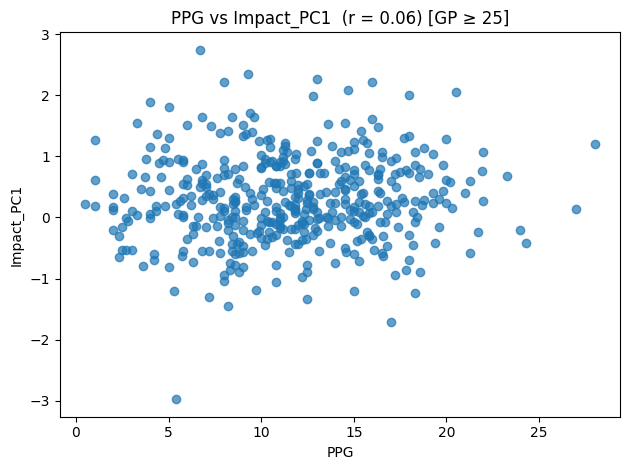

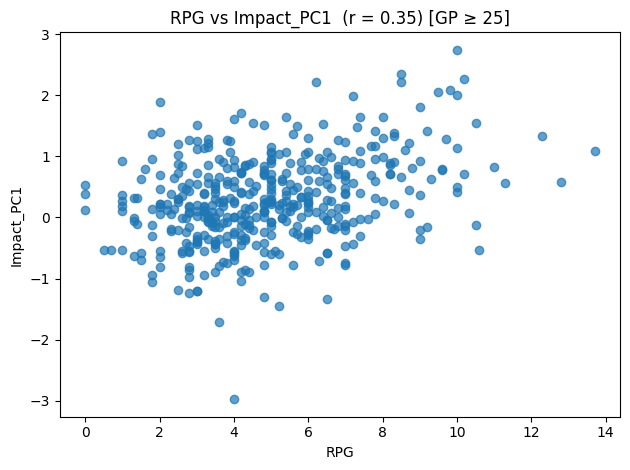

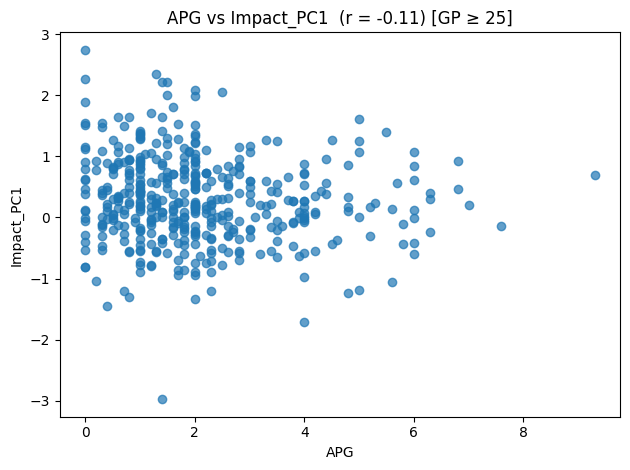

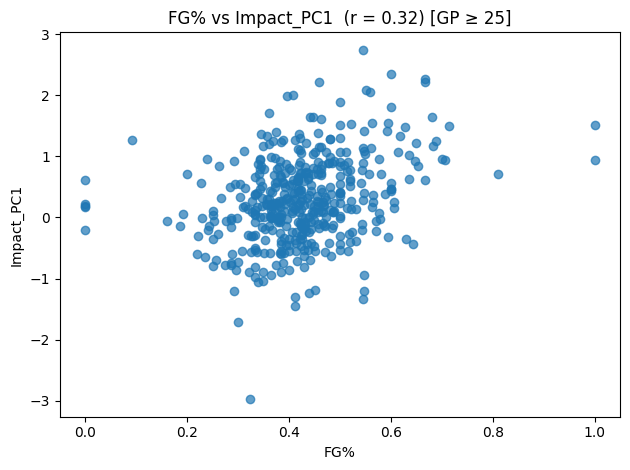

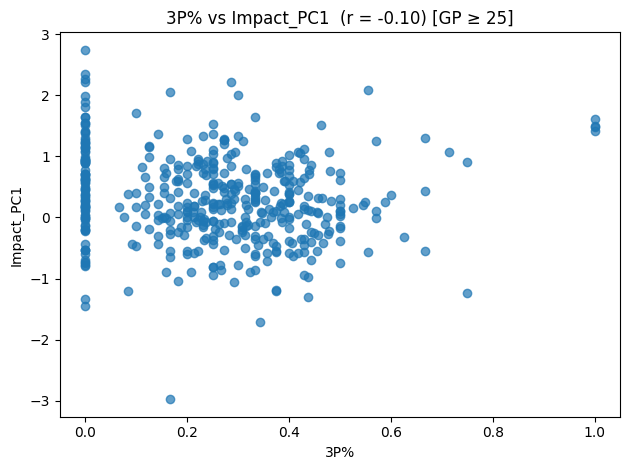

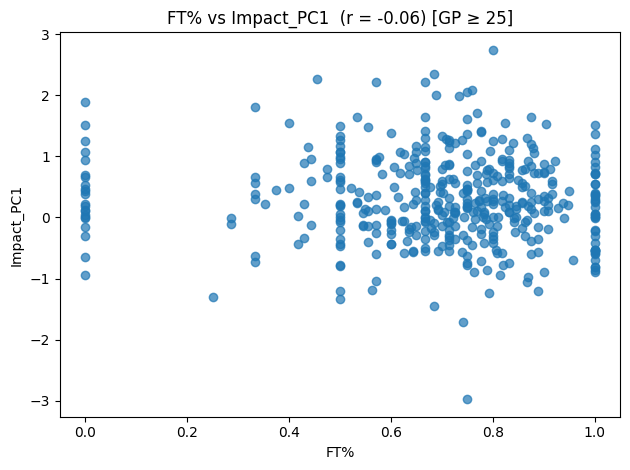

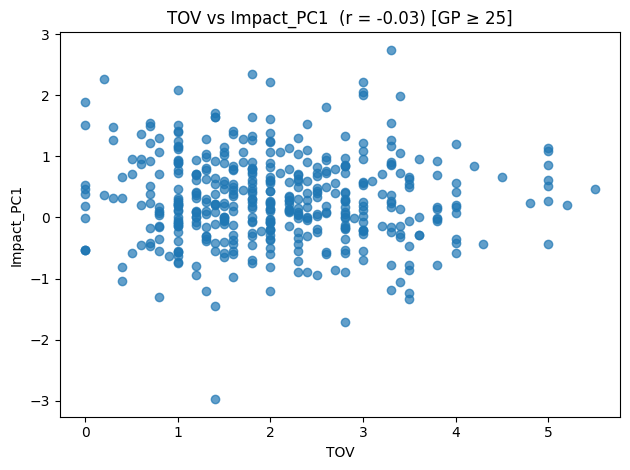

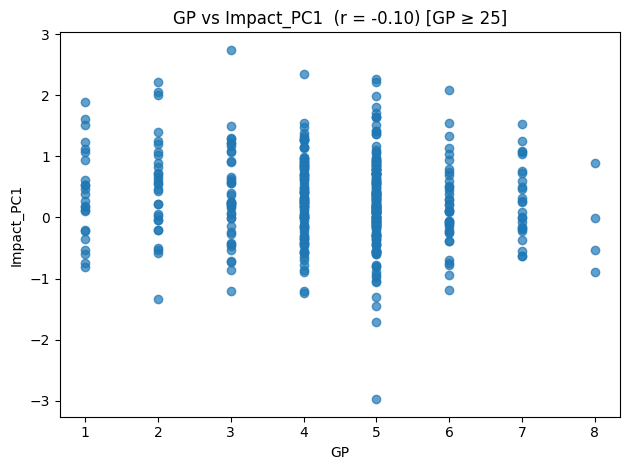

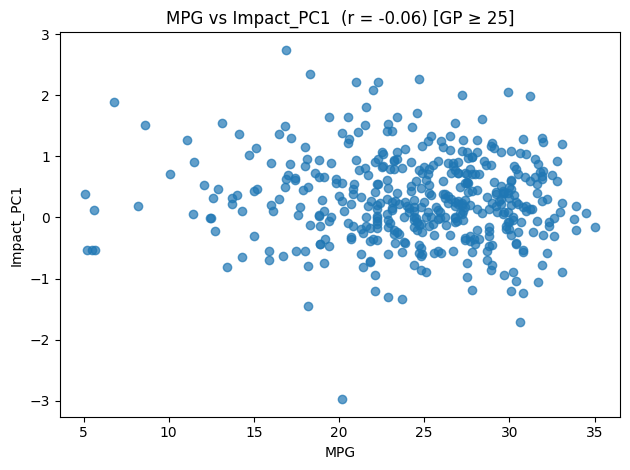

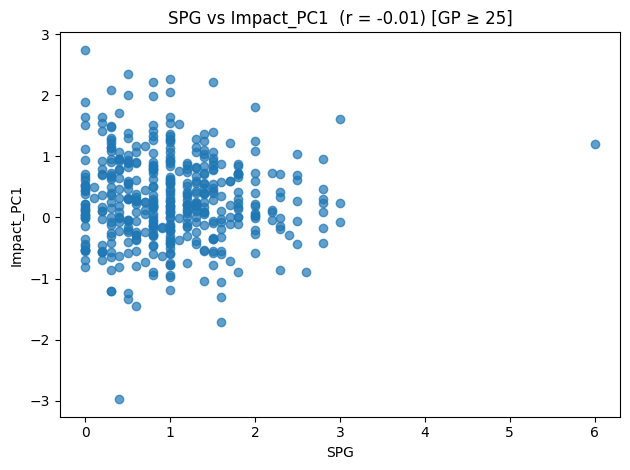

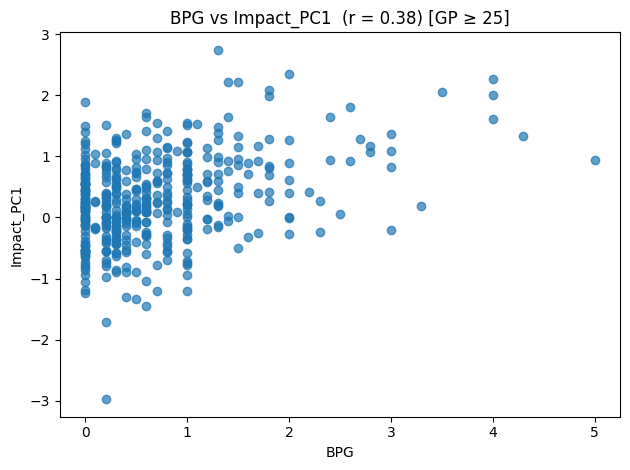

In [6]:
import matplotlib.pyplot as plt

df = pd.read_csv("rookies.csv")

# Define SL features to test
features = ["PPG", "RPG", "APG", "FG%", "3P%", "FT%", "TOV", "GP", "MPG", "SPG", "BPG"]

# Compute and print Pearson correlations
print("Correlations with Impact_PC1 (GP ≥ 25):")
for feat in features:
    r = df[feat].corr(df["Impact_PC1"])
    print(f"  {feat:4s} → r = {r:.2f}")

# Scatter‑plots
for feat in features:
    r = df[feat].corr(df["Impact_PC1"])
    plt.figure()
    plt.scatter(df[feat], df["Impact_PC1"], alpha=0.7)
    plt.xlabel(feat)
    plt.ylabel("Impact_PC1")
    plt.title(f"{feat} vs Impact_PC1  (r = {r:.2f}) [GP ≥ 25]")
    plt.tight_layout()
    plt.show()

Correlations Between Per-48 Summer League Stats and PC

Per‑48 SL feature correlations with Impact_PC1:
  PPG_48   → r = 0.11
  RPG_48   → r = 0.40
  APG_48   → r = -0.12
  SPG_48   → r = 0.00
  BPG_48   → r = 0.41
  TOV_48   → r = -0.00
  FG%      → r = 0.32
  3P%      → r = -0.10
  FT%      → r = -0.06
  GP       → r = -0.10
  MPG      → r = -0.06


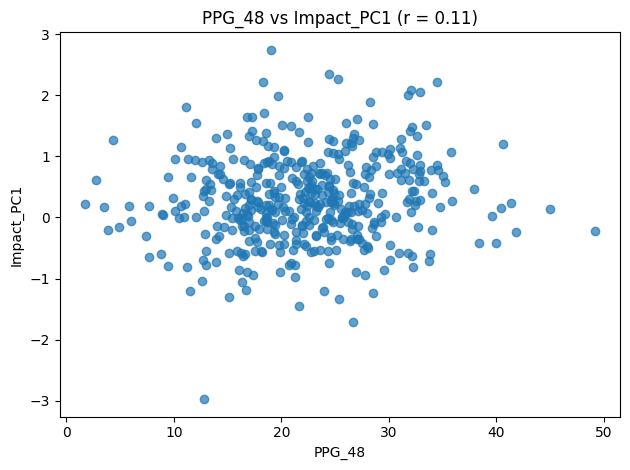

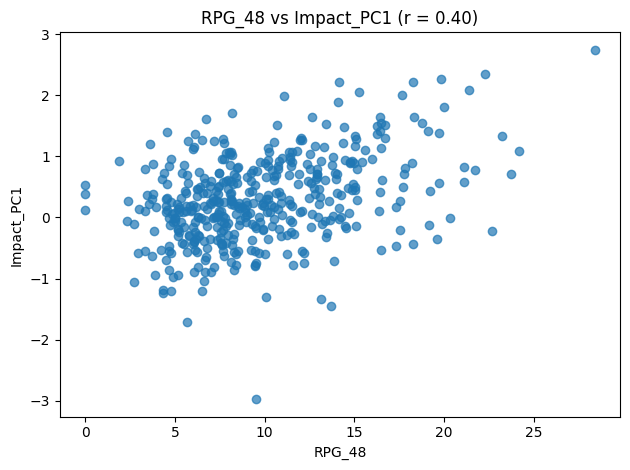

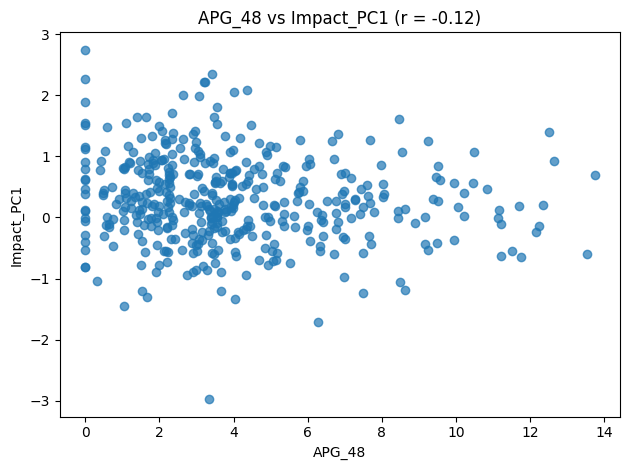

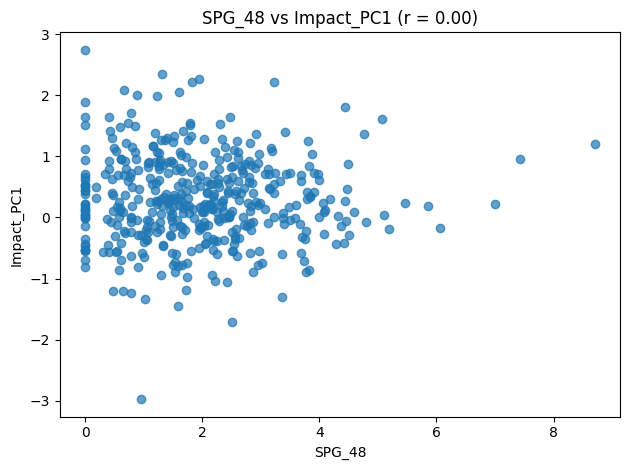

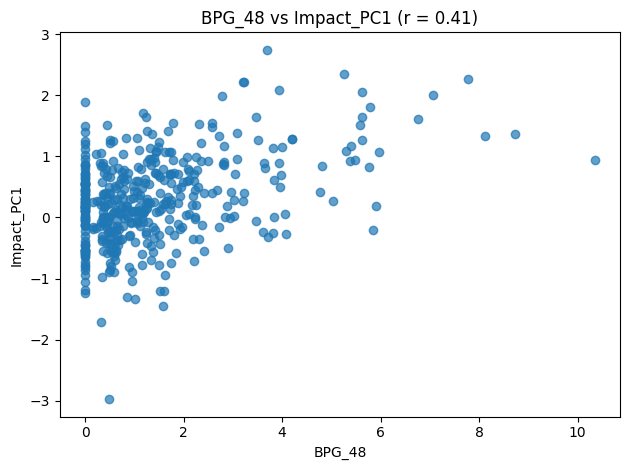

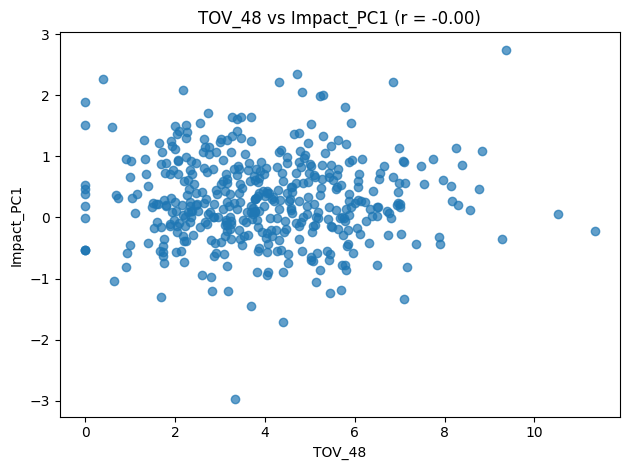

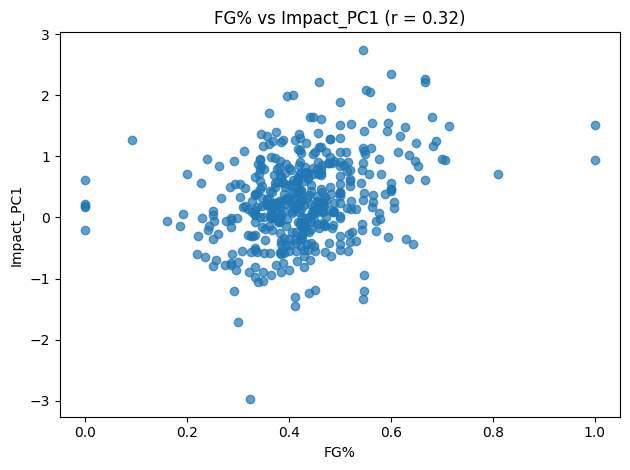

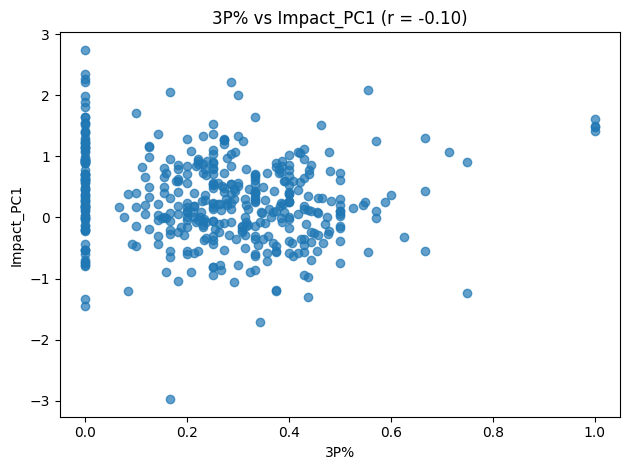

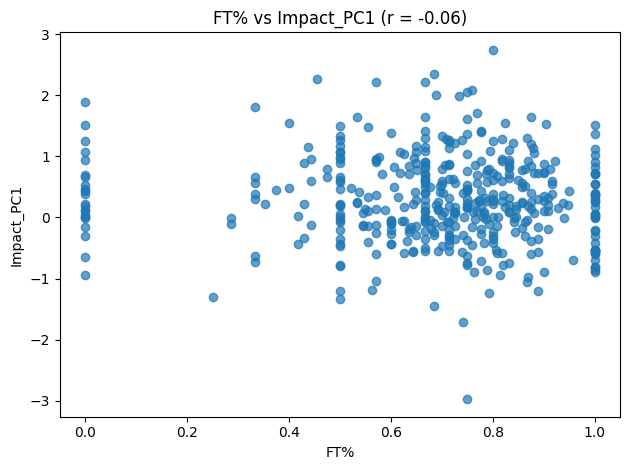

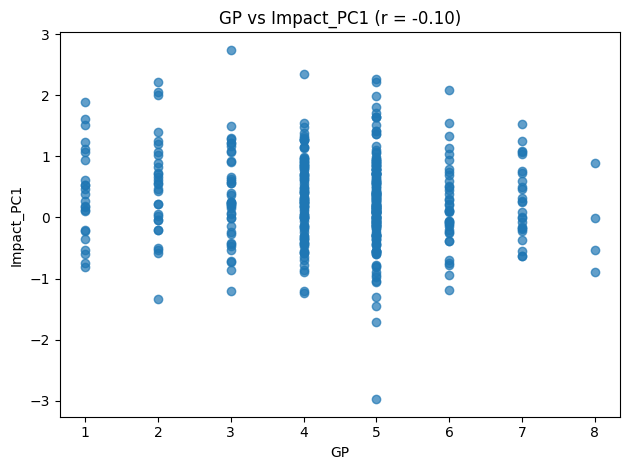

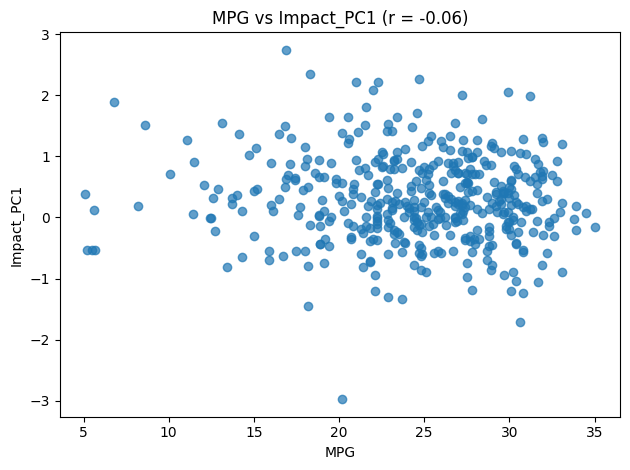

In [7]:
df = pd.read_csv("rookies.csv")    # <-- change filename here if needed

# 2) Compute per‑48‑minute rates for key box‑score stats
per48_stats = ["PPG", "RPG", "APG", "SPG", "BPG", "TOV"]
for stat in per48_stats:
    df[f"{stat}_48"] = df[stat] * 48 / df["MPG"]

# 3) Define the features to analyze: per‑48 stats plus the volume/percentage ones
features = [f"{stat}_48" for stat in per48_stats] + ["FG%", "3P%", "FT%", "GP", "MPG"]

# 4) Compute Pearson correlations with your composite target
corrs = {feat: df[feat].corr(df["Impact_PC1"]) for feat in features}
print("Per‑48 SL feature correlations with Impact_PC1:")
for feat, r in corrs.items():
    print(f"  {feat:8s} → r = {r:.2f}")

# 5) Scatter‑plots for each feature vs Impact_PC1
for feat, r in corrs.items():
    plt.figure()
    plt.scatter(df[feat], df["Impact_PC1"], alpha=0.7)
    plt.xlabel(feat)
    plt.ylabel("Impact_PC1")
    plt.title(f"{feat} vs Impact_PC1 (r = {r:.2f})")
    plt.tight_layout()
    plt.show()

### Model

In [8]:
df = pd.read_csv("rookies.csv")  

# Compute per‑48‑minute rates
for stat in ["PPG","RPG","APG","SPG","BPG","TOV"]:
    df[f"{stat}_48"] = df[stat] * 48 / df["MPG"]

# Define features (X) and target (y)
features = ["PPG_48","RPG_48","APG_48","SPG_48","BPG_48","TOV_48",
            "FG%","3P%","FT%","GP","MPG"]
X = df[features]
y = df["Impact_PC1"]

# Split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

# Predict & evaluate
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)
print("Test R²:  ", r2_score(y_test, y_pred))
print("Test MSE: ", mean_squared_error(y_test, y_pred))

# Review coefficients
coef_df = pd.Series(model.coef_, index=features).sort_values(ascending=False)
print("\nFeature coefficients:")
print(coef_df)


Test R²:   0.05729668918623232
Test MSE:  0.3942748843196983

Feature coefficients:
FG%       1.243036
BPG_48    0.138495
SPG_48    0.038490
RPG_48    0.032271
APG_48    0.018711
PPG_48    0.003467
MPG      -0.000457
TOV_48   -0.023353
GP       -0.028030
FT%      -0.105760
3P%      -0.203121
dtype: float64


In [9]:
# === Cell 1: Define and Train Ensemble Models ===
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor

# Base learners
ridge = ("ridge", Ridge(alpha=1.0))
rf    = ("rf", RandomForestRegressor(n_estimators=100, random_state=42))
gbr   = ("gbr", GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))

# Voting ensemble: averages predictions of ridge, RF, and GB
voting = VotingRegressor(estimators=[ridge, rf, gbr])

# Stacking ensemble: meta-learner is a Ridge on top of base predictions + original features
stacking = StackingRegressor(
    estimators=[ridge, rf, gbr],
    final_estimator=Ridge(alpha=1.0),
    passthrough=True,   # include X_train in meta-model
    cv=5
)

# Fit the ensembles
voting.fit(X_train, y_train)
stacking.fit(X_train, y_train)


,estimators,"[('ridge', ...), ('rf', ...), ...]"
,final_estimator,Ridge()
,cv,5
,n_jobs,None
,passthrough,True
,verbose,0
,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001


In [10]:
# === Cell 2: Evaluate Baselines and Ensembles ===
from sklearn.metrics import r2_score, mean_squared_error

# Also fit simple baselines
lin = LinearRegression().fit(X_train, y_train)
rid = Ridge(alpha=1.0).fit(X_train, y_train)

models = [
    ("Linear", lin),
    ("Ridge", rid),
    ("Voting", voting),
    ("Stacking", stacking),
]

results = []
for name, mdl in models:
    y_pred = mdl.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append((name, r2, mse))

# Summarize
results_df = pd.DataFrame(results, columns=["Model","R2","MSE"]).set_index("Model")
results_df


,R2,MSE
Model,,
Linear,0.057297,0.394275
Ridge,0.068061,0.389773
Voting,0.009950,0.414077
Stacking,0.092585,0.379516


In [12]:
# === Cell 3: Inspect Feature Importances / Coefficients ===

# Ridge baseline
print("Ridge coefficients:")
ridge_coefs = pd.Series(rid.coef_, index=features)
print(ridge_coefs.sort_values(ascending=False))

# Stacking meta‑model
print("\nStacking final estimator coefficients:")
# The meta‑model was trained on [original features] + [predictions from each base learner]
base_names = list(stacking.named_estimators_.keys())     # ['ridge', 'rf', 'gbr']
meta_index = features + base_names
meta_coefs = pd.Series(stacking.final_estimator_.coef_, index=meta_index)
print(meta_coefs.sort_values(ascending=False))


Ridge coefficients:
FG%       0.923476
BPG_48    0.141555
SPG_48    0.035665
RPG_48    0.033902
APG_48    0.017850
PPG_48    0.005940
MPG      -0.001550
TOV_48   -0.024228
GP       -0.024269
FT%      -0.115024
3P%      -0.173771
dtype: float64

Stacking final estimator coefficients:
GP        1.771245
3P%       0.358911
RPG_48    0.197106
BPG_48    0.083291
FG%       0.080407
TOV_48    0.040311
SPG_48    0.020578
gbr      -0.007310
APG_48   -0.021512
FT%      -0.057709
rf       -0.062056
ridge    -0.225339
MPG      -0.470710
PPG_48   -1.590129
dtype: float64


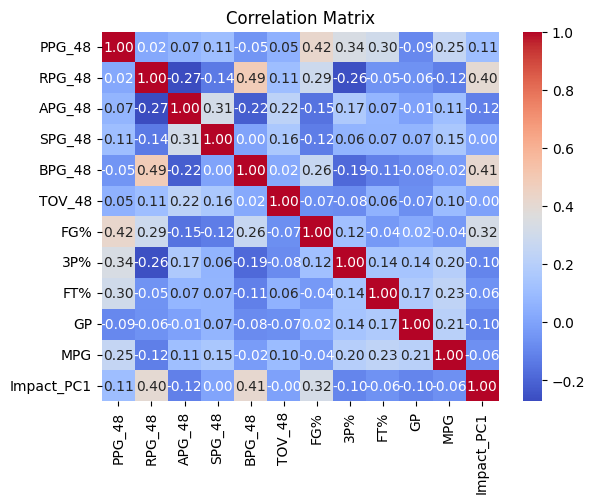

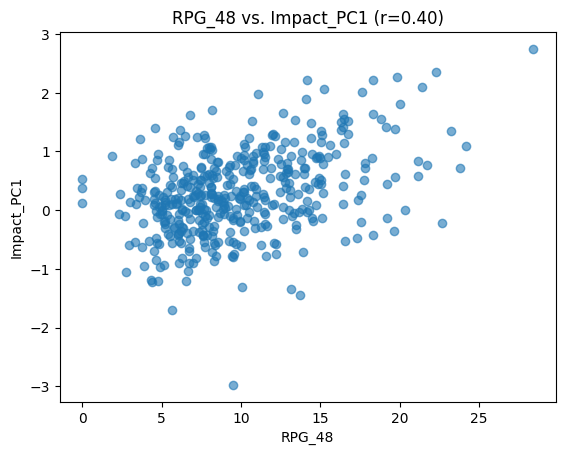

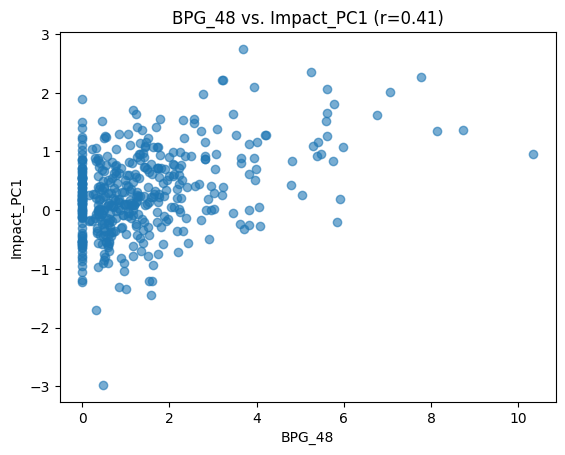

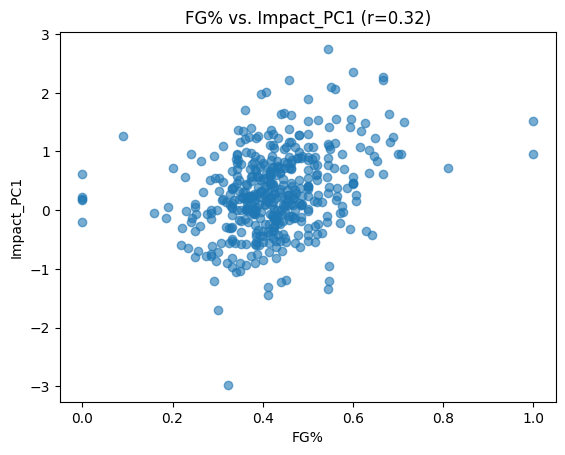

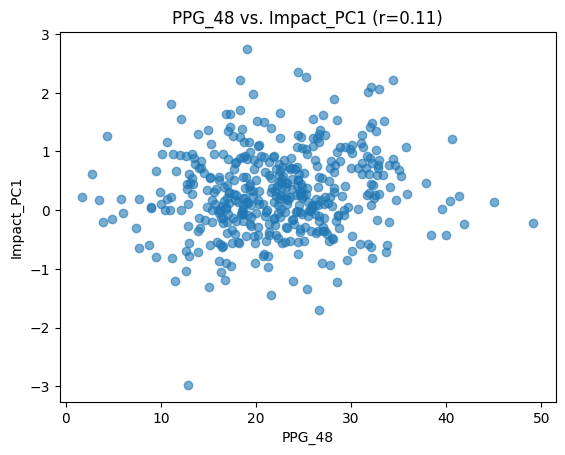

In [15]:
# Example code snippet for your blog:

import seaborn as sns
import matplotlib.pyplot as plt

# 1) Correlation heatmap
corr = df[features + ['Impact_PC1']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# 2) Scatter plot for strongest features
for feat in ['RPG_48','BPG_48','FG%', 'PPG_48']:
    plt.figure()
    plt.scatter(df[feat], df['Impact_PC1'], alpha=0.6)
    plt.xlabel(feat)
    plt.ylabel('Impact_PC1')
    plt.title(f"{feat} vs. Impact_PC1 (r={df[feat].corr(df['Impact_PC1']):.2f})")
    plt.show()


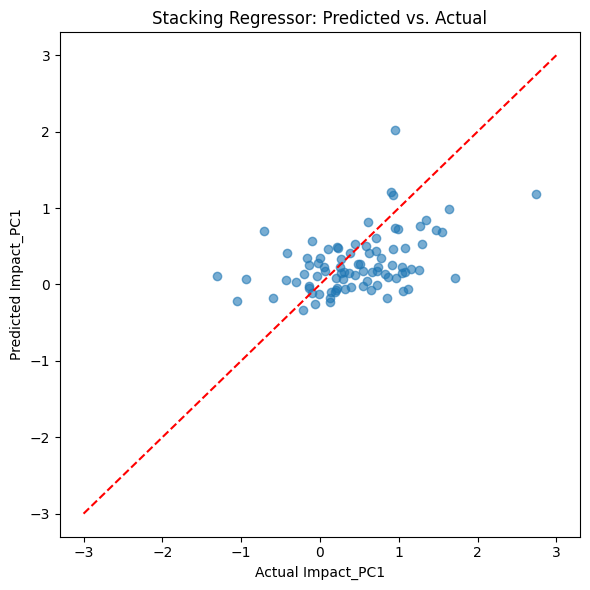

In [16]:
# Predicted vs Actual for Stacking
y_pred = stacking.predict(X_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([-3,3],[-3,3],"r--")
plt.xlabel("Actual Impact_PC1")
plt.ylabel("Predicted Impact_PC1")
plt.title("Stacking Regressor: Predicted vs. Actual")
plt.tight_layout()
plt.show()
